In [ ]:
### work on student dataset loaded in seaborn and check which is the optimum error and create knn model

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/DataScience75/Top_mentor_projects_Datasets/main/Students.csv"
data = pd.read_csv(url)
print(data.head(2))

      JEEPRE   JEEMAINS  STATUS
0  34.623660  78.024693       0
1  30.286711  43.894998       0


In [ ]:
data['STATUS'].value_counts()

1    60
0    40
Name: STATUS, dtype: int64

In [ ]:
data.shape

(100, 3)

In [ ]:
X = data[['JEEPRE', 'JEEMAINS']]
print(X)

In [ ]:
y = data['STATUS']
print(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape, X_test.shape

((80, 2), (20, 2))

In [ ]:
from math import sqrt   ### standard method to select k
sqrt(data.shape[0])   #### you choose either 9 or 11

10.0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)  ### first took neigh as 7 then after testing took 1
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred =clf.predict(X_test)
pred

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
y_test

40    1
21    1
7     1
99    1
9     1
65    0
44    0
53    0
30    1
86    0
16    1
96    1
59    1
41    0
8     1
89    0
39    0
55    0
83    1
34    0
Name: STATUS, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_test,pred)

0.9

<Axes: >

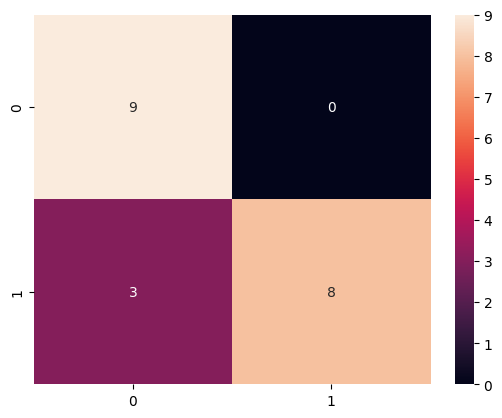

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

In [ ]:
##### error method, also called as elbow method
error = []
for i in range(1,31):  ##### considering k value from 1 to 30
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    predict_i = clf.predict(X_test)
    error.append(1 - accuracy_score(y_test, predict_i))

In [ ]:
error  ### chooosing first least odd value

[0.09999999999999998,
 0.19999999999999996,
 0.15000000000000002,
 0.25,
 0.15000000000000002,
 0.19999999999999996,
 0.15000000000000002,
 0.19999999999999996,
 0.19999999999999996,
 0.19999999999999996,
 0.15000000000000002,
 0.15000000000000002,
 0.19999999999999996,
 0.19999999999999996,
 0.25,
 0.25,
 0.25,
 0.25,
 0.19999999999999996,
 0.25,
 0.25,
 0.25,
 0.19999999999999996,
 0.19999999999999996,
 0.19999999999999996,
 0.19999999999999996,
 0.19999999999999996,
 0.19999999999999996,
 0.19999999999999996,
 0.19999999999999996]

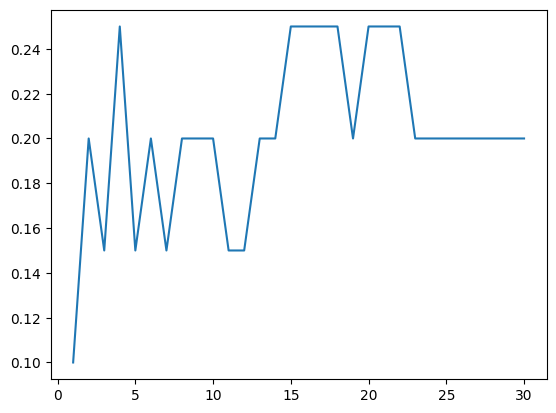

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,31), error)

<Axes: >

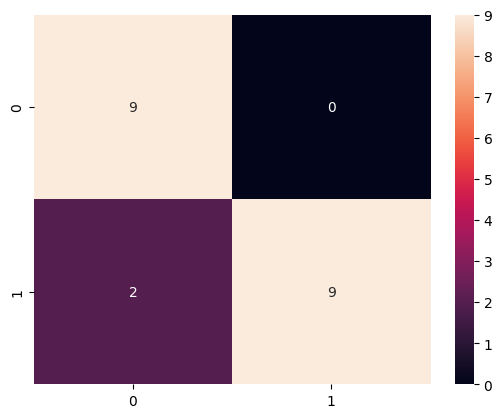

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)